# Task 0 - Warm up with the nation
## Imports

In [347]:
# visualize using matplotlib and/or seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data paths

In [348]:
data_paths = {
    'riket2023_åk9_np': "data/riket2023_åk9_np.xlsx",
    'betyg_o_prov_riksnivå': "data/betyg_o_prov_riksnivå.xlsx",
    'visualizations': "visualizations"
}

nationwide2023_grade9_nt = data_paths['riket2023_åk9_np']
grades_and_tests_national_level = data_paths['betyg_o_prov_riksnivå']
visualizations = data_paths['visualizations']

# Read and process Excel file

In [349]:
# Define the sheet names
sheet_names = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

# Initialize an empty dictionary to store DataFrames for each sheet
dfs = {}

# Loop through the sheet names and read each sheet into a DataFrame
for sheet_name in sheet_names:
    df = pd.read_excel(nationwide2023_grade9_nt, skiprows=8, sheet_name=sheet_name)
    
    # Rename the columns directly
    df.columns = [
        "Plats", "Huvudman",
        "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)",
        "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)",
        "Totalt (Poäng)", "Flickor (Poäng)", "Pojkar (Poäng)"
    ]
    
    # Store the DataFrame in the dictionary
    dfs[sheet_name] = df # dfs contains DataFrames for each sheet with the correct column names

# Access the DataFrame sheet for the subjects:
df_english = dfs['Engelska'].head()
df_math = dfs['Matematik'].head()
df_swedish = dfs['Svenska'].head()
df_swedish_as_secondlang = dfs['Svenska som andraspråk'].head()

# Output test
df_math.head()

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


## Quantity of students having an F in math: Total, Boys, Girls

In [356]:
total_ae_nmr = df_math['Totalt (A-F)'][0] * (df_math['Totalt (A-E)'][0] / 100)  # 106766 * 0.891 = 95128.506 (total number of students with grades A-E)
quantity_f_total = df_math['Totalt (A-F)'][0] - total_ae_nmr  # 106766 - 95128.506 = 11637.493 (total F quantity)

girls_ae_nmr = df_math['Flickor (A-F)'][0] * (df_math['Flickor (A-E)'][0] / 100)  # 51548 * 0.887 = 45723.076 (number of girls with grades A-E)
quantity_f_girls = df_math['Flickor (A-F)'][0] - girls_ae_nmr  # 51548 - 45723.076 = 5824.924 (total F quantity for girls)

boys_ae_nmr = df_math['Pojkar (A-F)'][0] * (df_math['Pojkar (A-E)'][0] / 100)  # 55218 * 0.895 = 49420.11 (number of boys with grades A-E)
quantity_f_boys = df_math['Pojkar (A-F)'][0] - boys_ae_nmr  # 55218 - 49420.11 = 5797.89 (total F quantity for boys)

# Outputting the values.
print(f"Total:{quantity_f_total}\nGirls:{quantity_f_girls}\nBoys:{quantity_f_boys}")

Total:11637.494000000006
Girls:5824.923999999999
Boys:5797.889999999999


## Plotting bar chart for total points for the different subjects.

15.7, 11.9, 13.6, 9.4


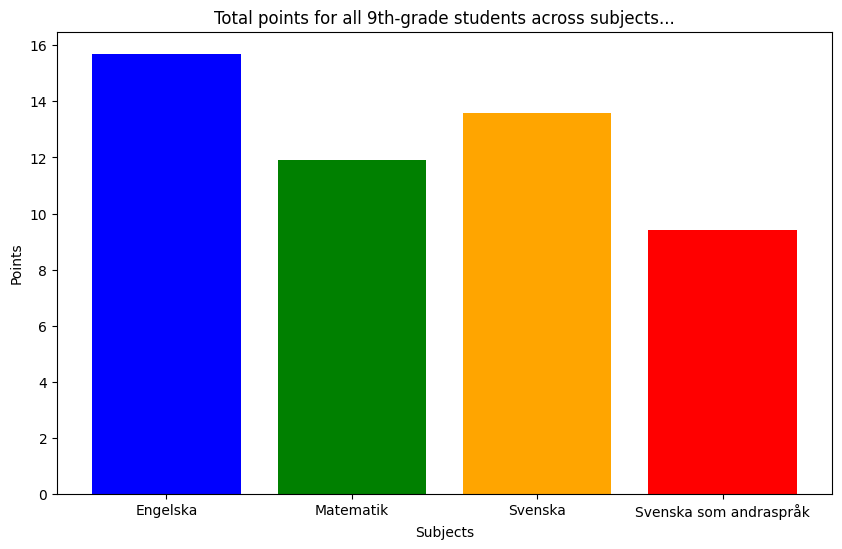

In [351]:
# Total points of the total students in 9th grade
total_points_english = df_english['Totalt (Poäng)'][0] 
total_points_math = df_math['Totalt (Poäng)'][0]
total_points_swe = df_swedish['Totalt (Poäng)'][0]
total_points_swe_as_seclang = df_swedish_as_secondlang['Totalt (Poäng)'][0]

print(f"{total_points_english}, {total_points_math}, {total_points_swe}, {total_points_swe_as_seclang}")

total_points = [total_points_english, total_points_math, total_points_swe, total_points_swe_as_seclang]  # Values
categories = sheet_names # Subjects

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'red']

# Adjusting figure size
plt.figure(figsize=(10, 6))

plt.bar(categories, total_points, color=colors)

plt.title('Total points for all 9th-grade students across subjects...')
plt.xlabel('Subjects') # Title is already clear enough
plt.ylabel('Points') # Title is already clear enough

# Save graph as a PNG file with color
plt.savefig('visualizations/total_points_for_subjects(A-F).png', bbox_inches='tight', facecolor='white')

# Show the graph
plt.show()